## SEMMA Data Analysis Process
Analyzing dataset on unicode emojis based on population

# Sampling: Initial Data Loading and Examination

In [1]:
# Importing necessary Python packages for Data Sampling
import pandas as pd

In [2]:
# Load the dataset
file_path_emoji = '/content/emojis.csv'
emojis_df = pd.read_csv(file_path_emoji)

In [3]:
# Initial examination of the dataset
emojis_df.info()
emojis_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Hex         1549 non-null   object
 1   Rank         1549 non-null   int64 
 2   Emoji        1549 non-null   object
 3   Year         1549 non-null   int64 
 4   Category     1549 non-null   object
 5   Subcategory  1549 non-null   object
 6   Name         1549 non-null   object
dtypes: int64(2), object(5)
memory usage: 84.8+ KB


,Hex,Rank,Emoji,Year,Category,Subcategory,Name
0,\x{1F602},1,😂,2010,Smileys & Emotion,face-smiling,face with tears of joy
1,\x{2764 FE0F},2,❤️,2010,Smileys & Emotion,emotion,red heart
2,\x{1F923},3,🤣,2016,Smileys & Emotion,face-smiling,rolling on the floor laughing
3,\x{1F44D},4,👍,2010,People & Body,hand-fingers-closed,thumbs up
4,\x{1F62D},5,😭,2010,Smileys & Emotion,face-concerned,loudly crying face


# Exploring: Statistical Summary and Visualizations

In [4]:
# Importing necessary Python packages for Data Exploration
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Statistical summary of the data
statistical_summary = emojis_df.describe(include='all')

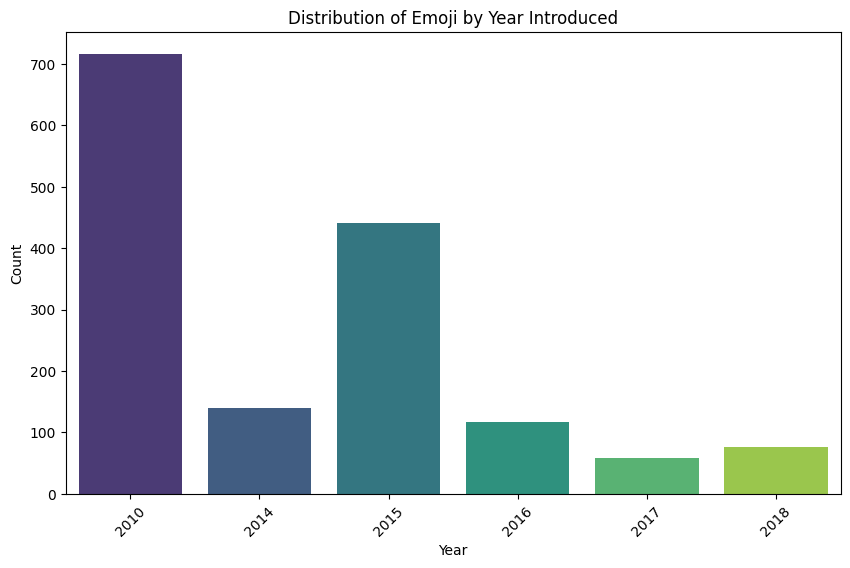

In [6]:
# Visualization of key features
# Distribution of Emoji by Year Introduced
plt.figure(figsize=(10, 6))
sns.countplot(data=emojis_df, x='Year', palette='viridis')
plt.title('Distribution of Emoji by Year Introduced')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

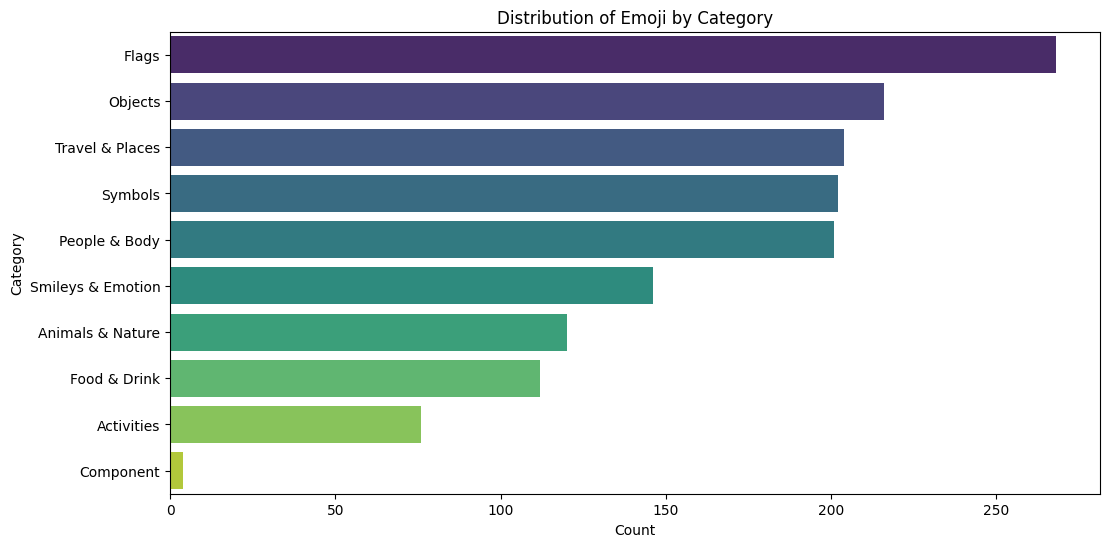

,Hex,Rank,Emoji,Year,Category,Subcategory,Name
count,1549,1549.000000,1549,1549.000000,1549,1549,1549
unique,1549,NaN,1549,NaN,10,98,1549
top,\x{1F602},NaN,😂,NaN,Flags,country-flag,face with tears of joy
freq,1,NaN,1,NaN,268,258,1
mean,NaN,775.000000,NaN,2012.899935,NaN,NaN,NaN
std,NaN,447.302098,NaN,2.813484,NaN,NaN,NaN
min,NaN,1.000000,NaN,2010.000000,NaN,NaN,NaN
25%,NaN,388.000000,NaN,2010.000000,NaN,NaN,NaN
50%,NaN,775.000000,NaN,2014.000000,NaN,NaN,NaN
75%,NaN,1162.000000,NaN,2015.000000,NaN,NaN,NaN


In [7]:
# Distribution of Emoji by Category
plt.figure(figsize=(12, 6))
sns.countplot(data=emojis_df, y='Category', palette='viridis', order = emojis_df['Category'].value_counts().index)
plt.title('Distribution of Emoji by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

statistical_summary

# Modifying: Handling Inconsistencies and Creating New Features

In [8]:
emojis_df.columns.tolist()

[' Hex', 'Rank', 'Emoji', 'Year', 'Category', 'Subcategory', 'Name']

In [9]:
emojis_df.columns = emojis_df.columns.str.strip()

In [10]:
emojis_df['Name_length'] = emojis_df['Name'].str.len()

In [11]:
emojis_df['Contains_face'] = emojis_df['Name'].str.contains('face').astype(int)

In [12]:
emojis_df[['Hex', 'Name_length', 'Contains_face']].head()

,Hex,Name_length,Contains_face
0,\x{1F602},22,1
1,\x{2764 FE0F},9,0
2,\x{1F923},29,0
3,\x{1F44D},9,0
4,\x{1F62D},18,1


# Modeling

In [13]:
# Importing necessary Python packages for Data Modeling and Assessment
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [14]:
# Select features and target variable
features = ['Year', 'Name_length', 'Contains_face']
target = 'Rank'

In [15]:
X = emojis_df[features]
y = emojis_df[target]

In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Assessment: Evaluation Metrics

In [19]:
# Assessment: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2

(129779.16676603984, 305.37923989386286, 0.35705445577406925)